<a href="https://colab.research.google.com/github/Phaneendra-S/BTP/blob/main/code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
urldata=pd.read_csv("data - Copy.csv")

# urldata1=pd.DataFrame(urldata,)

In [36]:
urldata.head()

,sno,url,label
0,1,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,2,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,3,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,4,mail.printakid.com/www.online.americanexpress....,1
4,5,thewhiskeydregs.com/wp-content/themes/widescre...,1


In [37]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']==0.0])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']==1.0])/len(urldata['label'])*100))
urldata.info()

Percent Of Malicious URLs:50.06 %
Percent Of Benign URLs:49.94 %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sno     95911 non-null  int64 
 1   url     95911 non-null  object
 2   label   95911 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ MB


Text(0, 0.5, 'Number Of URLs')

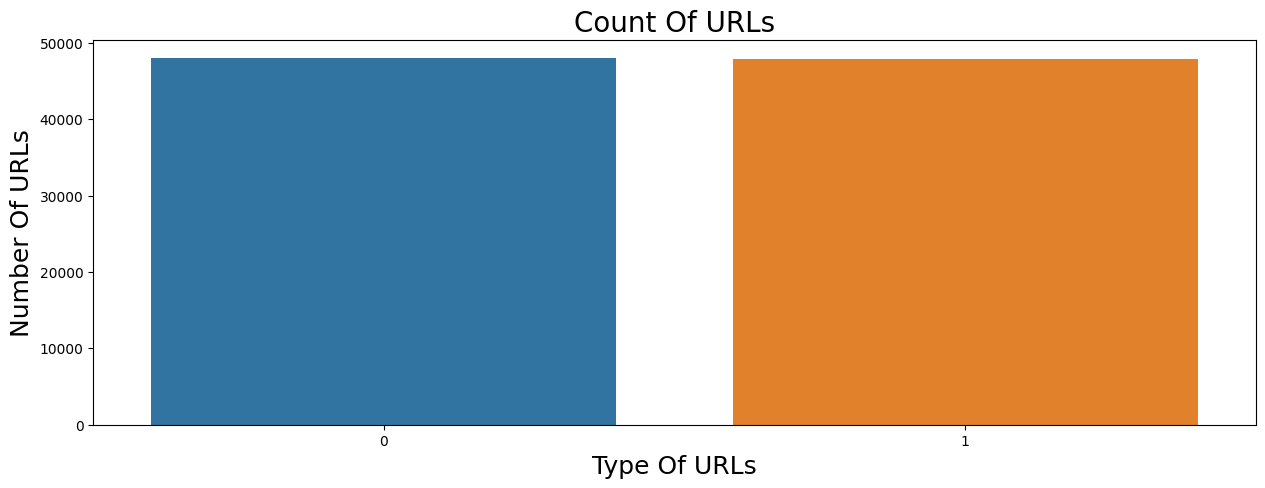

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Classifiers And Feature Extraction

In [39]:
!pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from urllib.parse import urlparse
from tld import get_tld
import os
import os.path

In [41]:
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [42]:
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [43]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [44]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [45]:
# urldata.drop()
# urldata.head()
urldata.tail()
# urldata.isnull().mean()
# urldata.isna().mean()

,sno,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
95906,95907,xbox360.ign.com/objects/850/850402.html,0,39,0,39,7,None,-1,0,...,0,0,3,0,0,0,0,12,21,3
95907,95908,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,44,0,44,8,None,-1,2,...,0,0,2,0,0,0,0,7,29,4
95908,95909,www.gamespot.com/xbox360/action/deadspace/,0,42,0,42,7,None,-1,0,...,0,0,2,0,0,0,1,3,33,4
95909,95910,en.wikipedia.org/wiki/Dead_Space_(video_game),0,45,0,45,4,None,-1,0,...,0,0,2,0,0,0,0,0,36,2
95910,95911,www.angelfire.com/goth/devilmaycrytonite/,0,41,0,41,4,None,-1,0,...,0,0,2,0,0,0,1,0,36,3


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [47]:
x = urldata[['url_length', 'hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir']]
y = urldata['label']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# x_train.head(3)
# x_test.head(3)
# y_train.head(3)
# y_test.head(3)

In [49]:
 # Create a logistic regression classifier
# log_model = LogisticRegression()

# Create a decision tree classifier
dt_model = DecisionTreeClassifier()

# Create a support vector machine classifier
svc_model = SVC()

# Create a random forest classifier
rfc_model = RandomForestClassifier()

# Initialize the LGBMClassifier
lgbm = LGBMClassifier(
    boosting_type='gbdt',         # Gradient boosting algorithm
    n_estimators=100,             # Number of trees to fit
    learning_rate=0.1,            # Learning rate for gradient boosting
    num_leaves=31,                # Number of leaves for each tree
    objective='binary',           # Binary classification problem
    random_state=42               # For reproducibility
)

# Initialize the AdaBoostClassifier
adaboost = AdaBoostClassifier(
    n_estimators=100,     # Number of trees to fit
    learning_rate=0.1,    # Learning rate for the weights update
    random_state=42       # For reproducibility
)

# Initialize the XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',  # Binary classification problem
    n_estimators=100,             # Number of trees to fit
    learning_rate=0.1,            # Learning rate for gradient boosting
    max_depth=3,                  # Maximum depth of each tree
    random_state=42               # For reproducibility
)

# Train the classifiers on the training set
dt_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
# log_model.fit(x_train, y_train)
rfc_model.fit(x_train, y_train)
lgbm.fit(x_train, y_train)
adaboost.fit(x_train, y_train)
xgb.fit(x_train, y_train)

# Evaluate the classifiers on the testing set
dt_predictions = dt_model.predict(x_test)
svc_predictions = svc_model.predict(x_test)
# log_predictions = log_model.predict(x_test)
rfc_predictions = rfc_model.predict(x_test)
lgbm_predictions = lgbm.predict(x_test)
adaboost_predictions = adaboost.predict(x_test)
xgb_predictions = xgb.predict(x_test)
                                    
# Print the accuracy scores
print("Decision tree accuracy:", accuracy_score(y_test, dt_predictions))
print("Support vector machine accuracy:", accuracy_score(y_test, svc_predictions))
# print("Logistic regression accuracy:", accuracy_score(y_test, log_predictions))
print("Random forest accuracy:", accuracy_score(y_test, rfc_predictions))
print("LGBM classifier accuracy:", accuracy_score(y_test, lgbm_predictions))
print("AdaBoost classifier accuracy:", accuracy_score(y_test, adaboost_predictions))
print("XGBoost classifier accuracy:", accuracy_score(y_test, xgb_predictions))

Decision tree accuracy: 0.8643219573225829
Support vector machine accuracy: 0.7794536734552027
Random forest accuracy: 0.8803433655383333
LGBM classifier accuracy: 0.8793355112254119
AdaBoost classifier accuracy: 0.8198373531660527
XGBoost classifier accuracy: 0.8496559393897268


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Convert the data to numpy arrays
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

# Define the architecture of the neural network
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

# Make predictions on the testing data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

print("Neural Networks accuracy:", accuracy_score(y_test, y_pred))

Epoch 1/150
2099/2099 [==============================] - 4s 2ms/step - loss: 2.3312 - accuracy: 0.6947
Epoch 2/150
2099/2099 [==============================] - 5s 2ms/step - loss: 0.4598 - accuracy: 0.7757
Epoch 3/150
2099/2099 [==============================] - 4s 2ms/step - loss: 0.4495 - accuracy: 0.7793
Epoch 4/150
2099/2099 [==============================] - 4s 2ms/step - loss: 0.4452 - accuracy: 0.7801
Epoch 5/150
2099/2099 [==============================] - 4s 2ms/step - loss: 0.4409 - accuracy: 0.7815
Epoch 6/150
2099/2099 [==============================] - 4s 2ms/step - loss: 0.4357 - accuracy: 0.7888
Epoch 7/150
2099/2099 [==============================] - 4s 2ms/step - loss: 0.4294 - accuracy: 0.7932
Epoch 8/150
2099/2099 [==============================] - 4s 2ms/step - loss: 0.4255 - accuracy: 0.7982
Epoch 9/150
2099/2099 [==============================] - 5s 2ms/step - loss: 0.4239 - accuracy: 0.7994
Epoch 10/150
2099/2099 [==============================] - 4s 2ms/step - l

In [ ]:
# import pandas as pd
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from sklearn.model_selection import train_test_split

# # Load the data
# data = urldata

# # Split the data into input features and target variable
# x = data.drop(labels=["label"], axis=1)
# y = data["label"]

# # Normalize the data
# # x = x / 255.0

# # Reshape the data for use in a CNN
# x = x.values.reshape(-1, 28, 28, 1)

# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Define the CNN model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation="softmax"))

# # Compile the model
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# # Fit the model to the training data
# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# # Evaluate the model on the testing data
# score = model.evaluate(x_test, y_test, verbose=0)
# print("Test loss:", score[0])
# print("Test accuracy:", score[1])

# # Make predictions on the test data
# predictions = model.predict(x_test)

# # Convert the predictions to class labels
# labels = np.argmax(predictions, axis=1)

# # Print the confusion matrix
# from sklearn.metrics import confusion_matrix
# conf_matrix = confusion_matrix(y_test, labels)
# print(conf_matrix)


In [ ]:
# Compute the confusion matrix for lgbm
cm_lgbm = confusion_matrix(y_test, lgbm_predictions)

# Print the confusion matrix as a heatmap
sns.heatmap(cm_lgbm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Compute the confusion matrix for lgbm
cm_rfc = confusion_matrix(y_test, rfc_predictions)

# Print the confusion matrix as a heatmap
sns.heatmap(cm_rfc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#cross validation for LGBM Classifier
from sklearn.model_selection import cross_val_score,KFold
X=x_train
Y=y_train
crossval_lgbm=LGBMClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(crossval_lgbm,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

In [ ]:
#cross validation for RF Classifier
from sklearn.model_selection import cross_val_score,KFold
X=x_train
Y=y_train
crossval_rfc=RandomForestClassifier()
kf=KFold(n_splits=10)
score=cross_val_score(crossval_rfc,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))